In [62]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer, load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier, AdaBoostClassifier
from   sklearn.linear_model    import LogisticRegression
from   sklearn.svm             import SVC
from   sklearn.neighbors       import KNeighborsClassifier
from   xgboost                 import XGBClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer , precision_recall_curve , roc_curve,roc_auc_score 

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

import missingno as msno 

import graphviz

from IPython.display import Image


print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.3
pandas version -  1.3.2
d
sklearn version -  0.24.2


#### voting 연습 


In [65]:
mnist = load_digits()

In [66]:
features = mnist.data
labels = mnist.target

In [67]:
features.shape , labels.shape

((1797, 64), (1797,))

In [68]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth= 8,
                                  max_features= 32,
                                  random_state=35)

knn_model = KNeighborsClassifier(n_neighbors=299)

svm_model = SVC(probability=True)

In [69]:
X_train, X_test , y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=100)
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [70]:
def metrics_evaluation(target , prediction) :
    print('accuracy:'  , accuracy_score(target , prediction))

In [71]:
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [72]:
metrics_evaluation(y_test,dt_pred)
metrics_evaluation(y_test,knn_pred)
metrics_evaluation(y_test,svm_pred)


accuracy: 0.8694444444444445
accuracy: 0.8555555555555555
accuracy: 0.9916666666666667


In [76]:
hard_voting_model = VotingClassifier(estimators=[('tree',dt_model),('knn',knn_model),('svm',svm_model)],
                                weights=[1,1,1],
                                voting = 'hard')

hard_voting_model.fit(X_train,y_train)
hard_voting_pred = hard_voting_model.predict(X_test)
metrics_evaluation(y_test,hard_voting_pred)

accuracy: 0.9611111111111111


In [77]:
soft_voting_model = VotingClassifier(estimators=[('tree',dt_model),('knn',knn_model),('svm',svm_model)],
                                weights=[1,1,1],
                                voting = 'soft')

soft_voting_model.fit(X_train,y_train)
soft_voting_pred = soft_voting_model.predict(X_test)
metrics_evaluation(y_test,soft_voting_pred)

accuracy: 0.9388888888888889


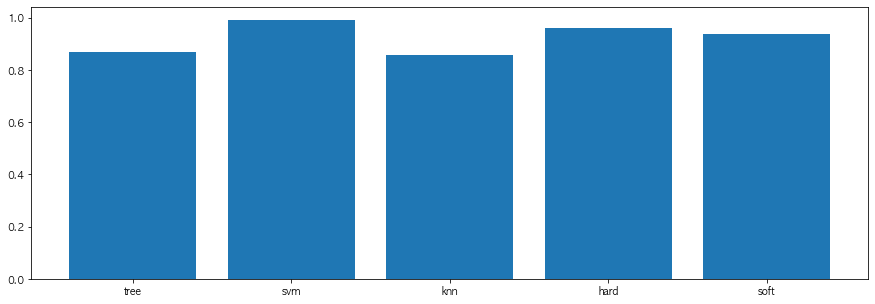

In [79]:
plt.figure(figsize=(15,5))
x = np.arange(5)
plt.bar(x,height=[
    accuracy_score(y_test,dt_pred),
    accuracy_score(y_test,svm_pred),    
    accuracy_score(y_test,knn_pred),
    accuracy_score(y_test,hard_voting_pred),
    accuracy_score(y_test,soft_voting_pred),
])
plt.xticks(x,['tree','svm','knn','hard','soft'])
plt.show()
plt.close()

#### bagging 연습

In [3]:
mnist = load_digits()
features = mnist.data
labels = mnist.target

In [4]:
def user_cross_val(classfier,features,labels):
    scores = cross_val_score(classfier,features,labels,cv=10,scoring='accuracy')
    return scores

In [5]:
tree_cv_scores = user_cross_val(DecisionTreeClassifier(),features,labels)
print(tree_cv_scores)
print(np.mean(tree_cv_scores))

[0.80555556 0.85555556 0.85       0.78333333 0.8        0.89444444
 0.90555556 0.83240223 0.84357542 0.81564246]
0.8386064556176288


In [10]:
bagging_cv_scores = user_cross_val(RandomForestClassifier(),features,labels)
print(bagging_cv_scores)
print(np.mean(bagging_cv_scores))

[0.9        0.97222222 0.94444444 0.93333333 0.95555556 0.96666667
 0.96666667 0.97765363 0.9273743  0.93854749]
0.9482464307883302


#### 배깅 실습

In [15]:
features_name = pd.read_csv('./Data/human_activity/features.txt',header=None,sep='\s+',names=['feature_names'])
features_name

,feature_names
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


- train

In [21]:
X_train = pd.read_csv('./Data/human_activity/Train/X_train.txt',header=None,sep='\s+')
X_train.columns = features_name['feature_names']
X_train

feature_names,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [23]:
y_train = pd.read_csv('./Data/human_activity/Train/y_train.txt',header=None,sep='\s+',names=['target'])

y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


- test

In [25]:
X_test = pd.read_csv('./Data/human_activity/Test/X_test.txt',header=None,sep='\s+')
X_test.columns = features_name['feature_names']
X_test

feature_names,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [26]:
y_test = pd.read_csv('./Data/human_activity/Test/y_test.txt',header=None,sep='\s+',names=['target'])

y_test

,target
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [27]:
##타켓의 분포
y_train['target'].value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: target, dtype: int64

In [28]:
def metrics_eval(target,predict):
    print('accuracy \n',accuracy_score(target,predict
                                      ))

#### 트리 모델

In [29]:
tree_model = DecisionTreeClassifier(random_state=111)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
metrics_eval(y_test,y_pred)

accuracy 
 0.8055028462998103


In [31]:
# 모델의 parmeter 확인
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 111,
 'splitter': 'best'}

In [32]:
params = {
    'max_depth':[6,8,10,12,16,20,24],
}
dt_grid_cv = GridSearchCV(tree_model,param_grid=params,scoring='accuracy',cv=5,verbose=1)
dt_grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=111),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [36]:
# 최적의 파람
print(dt_grid_cv.best_params_)
# 베스트 스코어
print(dt_grid_cv.best_score_)
# 결과
print(dt_grid_cv.cv_results_)

{'max_depth': 8}
0.8469211829804232
{'mean_fit_time': array([1.61087523, 1.99998765, 2.33418875, 2.60155606, 2.95805678,
       3.01962447, 3.00731421]), 'std_fit_time': array([0.02961067, 0.02077288, 0.04243503, 0.08393627, 0.22014113,
       0.24807782, 0.24867308]), 'mean_score_time': array([0.00405984, 0.00392427, 0.00366597, 0.00373573, 0.00376596,
       0.00369353, 0.00368352]), 'std_score_time': array([3.95804209e-04, 3.20706458e-04, 4.93113718e-05, 6.18653535e-05,
       2.34821052e-04, 7.29871509e-05, 9.39050126e-05]), 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 6}, {'max_depth': 8}, {'max_depth': 10}, {'max_depth': 12}, {'max_depth': 16}, {'max_depth': 20}, {'max_depth': 24}], 'split0_test_score': array([0.8030888 , 0.81402831, 0.81338481, 0.79150579, 0.79021879,
       0.79021879, 0.79021879]), 'split1_test_scor

In [39]:
# 결과를 조금 편하게 보기 위해서 데이터 프레임 형식으로
pd.DataFrame(dt_grid_cv.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'max_depth': 6},0.821169,7
1,{'max_depth': 8},0.846921,1
2,{'max_depth': 10},0.842154,2
3,{'max_depth': 12},0.834947,3
4,{'max_depth': 16},0.834303,4
5,{'max_depth': 20},0.828508,5
6,{'max_depth': 24},0.828508,5


#### 랜덤포레스트 

In [40]:
rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
metrics_eval(y_test,y_pred)

accuracy 
 0.9089184060721063


In [41]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

In [45]:
params= {
    'n_estimators' : [10,100,200],
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_leaf' : [8,12,18]
}
rf_grid_cv = GridSearchCV(rf_model,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
rf_grid_cv.fit(X_train,y_train)


Fitting 5 folds for each of 63 candidates, totalling 315 fits


/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iganghui/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_leaf': [8, 12, 18],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy', verbose=1)

In [46]:
# 최적의 파람
print(rf_grid_cv.best_params_)
# 베스트 스코어
print(rf_grid_cv.best_score_)
# 결과
print(rf_grid_cv.cv_results_)

{'max_depth': 12, 'min_samples_leaf': 8, 'n_estimators': 200}
0.9112956945539045
{'mean_fit_time': array([ 0.71777377,  6.78550272, 13.57342324,  0.72940822,  6.67008681,
       13.01075368,  0.70816679,  6.37652426, 12.80811114,  0.85040841,
        8.14731669, 15.95646076,  0.85826893,  7.78164525, 15.35080657,
        0.80662007,  7.46138873, 14.87753615,  0.91648293,  8.76705232,
       17.27985597,  0.91002374,  8.3450304 , 16.7134551 ,  0.85505829,
        8.07237139, 16.26561279,  0.98345098,  9.24798622, 18.13206463,
        0.91235204,  8.70113235, 17.49674945,  0.87954459,  8.30261316,
       16.60606289,  0.96891565,  9.39943442, 19.11446872,  0.96902685,
        9.09741178, 18.05340776,  0.91117945,  8.47608194, 16.76900287,
        1.0046494 ,  9.46492939, 18.88868794,  0.96542544,  8.86365767,
       17.74038668,  0.88373117,  8.49204683, 16.66145787,  0.99389396,
        9.32420464, 18.60375762,  0.94408312,  8.80517263, 17.54138193,
        0.90814161,  8.14450812, 13.7

In [48]:
# 최종 test
refit_rf_model = RandomForestClassifier(n_estimators=200,max_depth=12,min_samples_leaf=8,random_state=111)
refit_rf_model.fit(X_train,y_train)
y_pred = refit_rf_model.predict(X_test)
metrics_eval(y_test,y_pred)

accuracy 
 0.9029095509171411


In [50]:
def human_activity_data():
    features_name = pd.read_csv('./Data/human_activity/features.txt',header=None,sep='\s+',names=['feature_names'])

    X_train = pd.read_csv('./Data/human_activity/Train/X_train.txt',header=None,sep='\s+')
    X_train.columns = features_name['feature_names']

    y_train = pd.read_csv('./Data/human_activity/Train/y_train.txt',header=None,sep='\s+',names=['target'])


    X_test = pd.read_csv('./Data/human_activity/Test/X_test.txt',header=None,sep='\s+')
    X_test.columns = features_name['feature_names']

    y_test = pd.read_csv('./Data/human_activity/Test/y_test.txt',header=None,sep='\s+',names=['target'])
    
    return X_train , X_test, y_train, y_test


In [52]:
X_train,X_test,y_train,y_test = human_activity_data()
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((7767, 561), (3162, 561), (7767, 1), (3162, 1))

In [57]:
ada_model = AdaBoostClassifier(n_estimators=60,learning_rate=0.4)
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6524351676154333


In [54]:
ada_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

#### eXtra Gradient Boost

In [61]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_df['target'] = cancer.target
display(cancer_df.head())
cancer_label = cancer_df['target']
cancer_features = cancer_df.drop('target',axis=1)

X_train, X_test,y_train,y_test = train_test_split(cancer_features,cancer_label,test_size=0.2,random_state=100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [70]:
xgboost_model = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
#print(xgboost_model.get_xgb_params())
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 3,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [74]:
xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)
metrics_eval(y_test,y_pred)

[14:28:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy 
 0.9649122807017544


In [ ]:
# logloss: 오류에 대한 평가성능 지표